In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups

In [3]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories=data.target_names

In [6]:
#training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)


In [7]:
test=fetch_20newsgroups(subset='test', categories=categories)

In [8]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [ ]:
print(test.data[5])

In [9]:
print(len(train.data))

11314


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


In [11]:
#Creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())

In [13]:
#Training the model with the train data 
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
#Creating lables fro the test data
labels=model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

Text(73.653125, 0.5, 'predicted label')

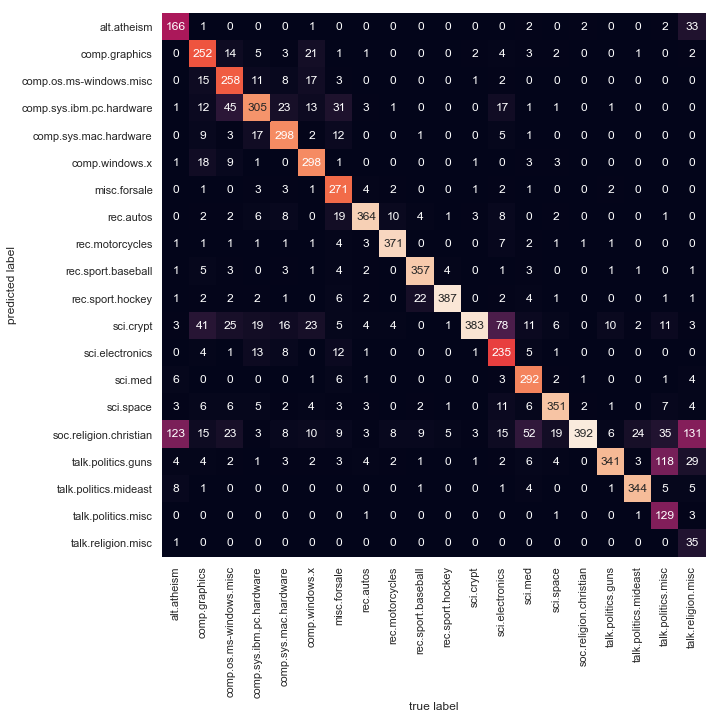

In [23]:
# creating confusion matrix and heat map 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
#red squares - mislabeled data
#diagonal line - when the prediction and the true values come together


In [25]:
#predicting category on new data based on trained model
def predict_category (s, train=train, model=model):
    pred=model.predict([s]) # s string
    return train.target_names[pred[0]]

In [27]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [29]:
predict_category('Sending load to International Space Station')

'sci.space'

In [30]:
predict_category('President')

'talk.politics.misc'

In [32]:
predict_category('dogs')

'rec.motorcycles'

In [33]:
predict_category('cats')

'rec.motorcycles'

In [34]:
predict_category('fish')

'rec.sport.hockey'

In [35]:
predict_category('elections')

'talk.politics.misc'

In [37]:
predict_category('artificial intelligence')

'soc.religion.christian'

In [38]:
predict_category('data science')

'sci.space'

In [39]:
predict_category('bmw')

'rec.motorcycles'

In [41]:
predict_category('NGOs')

'rec.sport.hockey'